In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv(r"D:\Power bi\OASIS Internship\Task-1\retail_sales_dataset.csv")  # make sure your retail_sales_dataset.csv is uploaded or in the same folder

# Step 3: View the first few rows
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
print(df.head())            # View first 5 rows
print(df.info())            # Data types & missing values
print(df.isnull().sum())    # Count missing values

# Drop or fill missing values if needed
df.dropna(inplace=True)     # OR use df.fillna(value) if filling is more appropriate

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   obj

In [5]:
print(df.describe())       # Includes mean, std, min, max, etc.

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [7]:
print(df.median(numeric_only=True))                # Median
print(df.mode(numeric_only=True).iloc[0])          # First mode
print(df.std(numeric_only=True))                   # Standard deviation


Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64
Transaction ID     1.0
Age               43.0
Quantity           4.0
Price per Unit    50.0
Total Amount      50.0
Name: 0, dtype: float64
Transaction ID    288.819436
Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


In [11]:
df['Date'] = pd.to_datetime(df['Date'])  
df.set_index('Date', inplace=True)


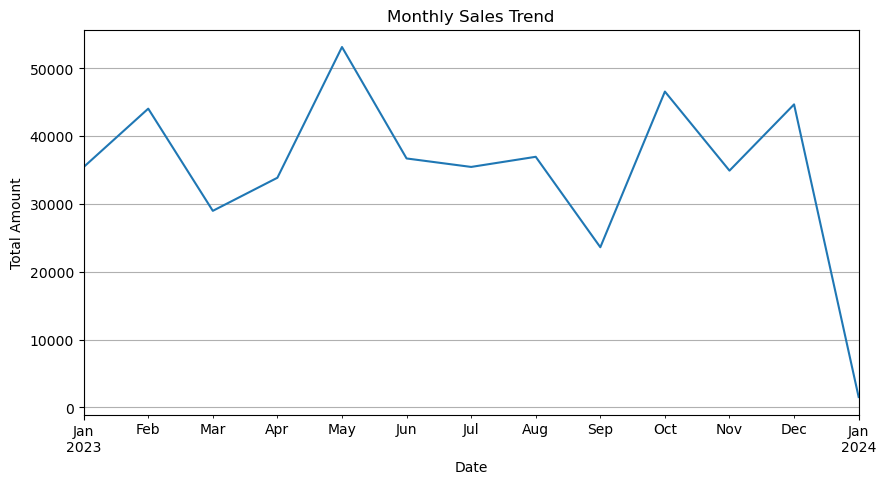

In [19]:
monthly_sales = df['Total Amount'].resample('ME').sum()    #Monthly Sales Trend
monthly_sales.plot(figsize=(10,5), title='Monthly Sales Trend')
plt.ylabel('Total Amount')
plt.xlabel('Date')
plt.grid()
plt.show()


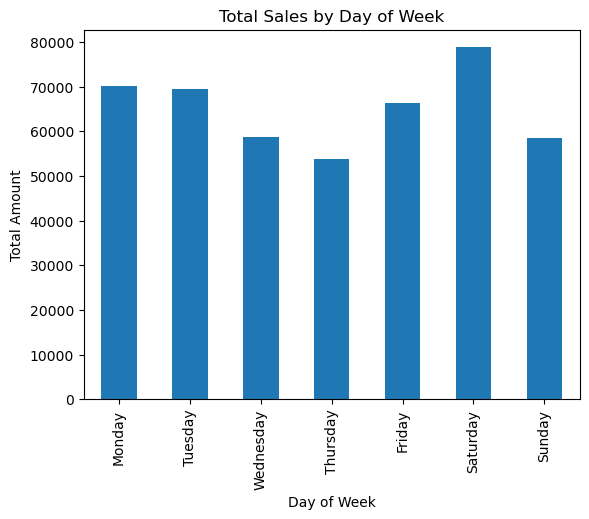

In [21]:
df['Day of Week'] = df.index.day_name()
df.groupby('Day of Week')['Total Amount'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).plot(kind='bar', title='Total Sales by Day of Week')
plt.ylabel('Total Amount')
plt.show()


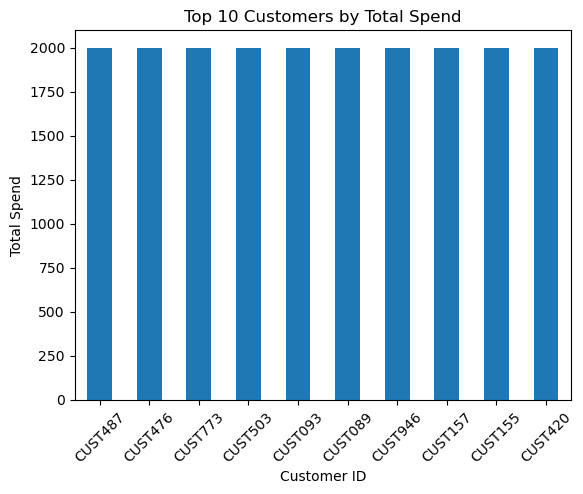

In [23]:
df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10).plot(
    kind='bar', title='Top 10 Customers by Total Spend'
)
plt.ylabel('Total Spend')
plt.xlabel('Customer ID')
plt.xticks(rotation=45)
plt.show()


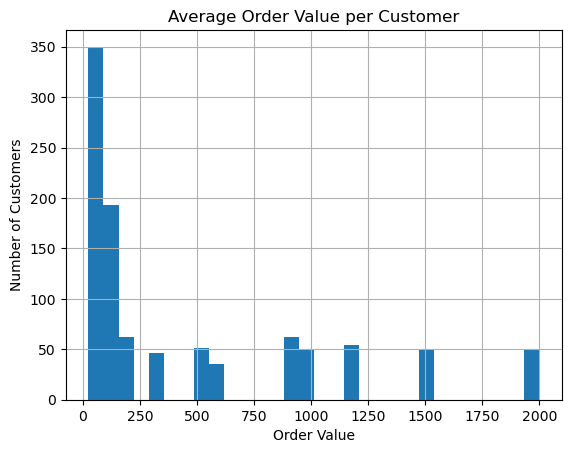

In [25]:
avg_order_value = df.groupby('Customer ID')['Total Amount'].mean()

avg_order_value.hist(bins=30)
plt.title('Average Order Value per Customer')
plt.xlabel('Order Value')
plt.ylabel('Number of Customers')
plt.show()


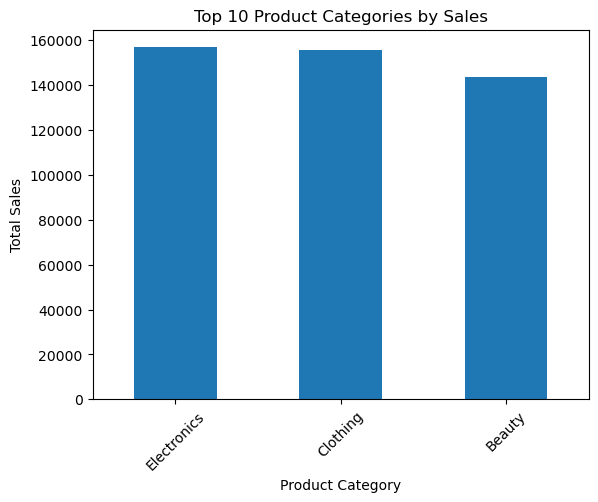

In [27]:
df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(10).plot(
    kind='bar', title='Top 10 Product Categories by Sales'
)
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


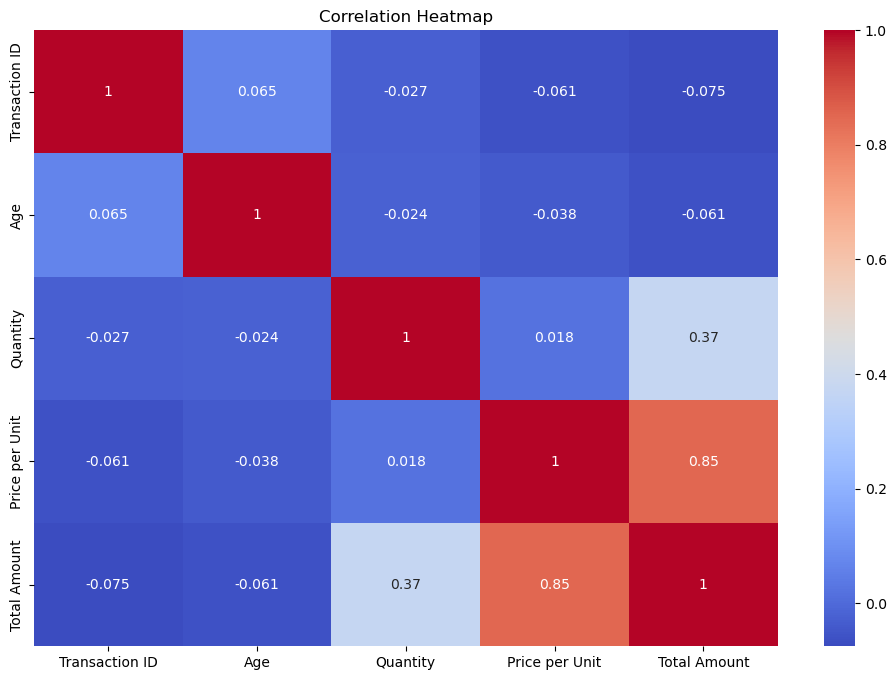

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


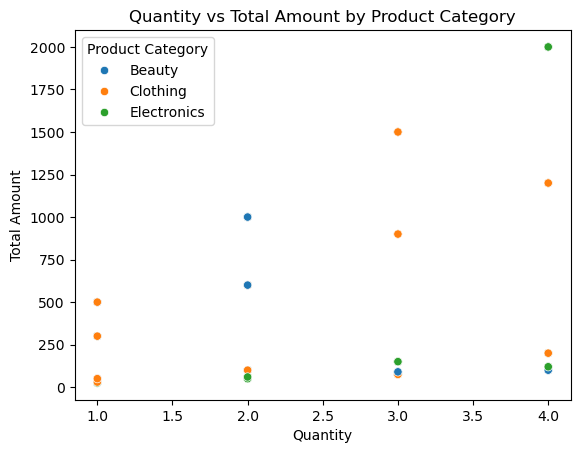

In [31]:
sns.scatterplot(data=df, x='Quantity', y='Total Amount', hue='Product Category')
plt.title('Quantity vs Total Amount by Product Category')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.show()


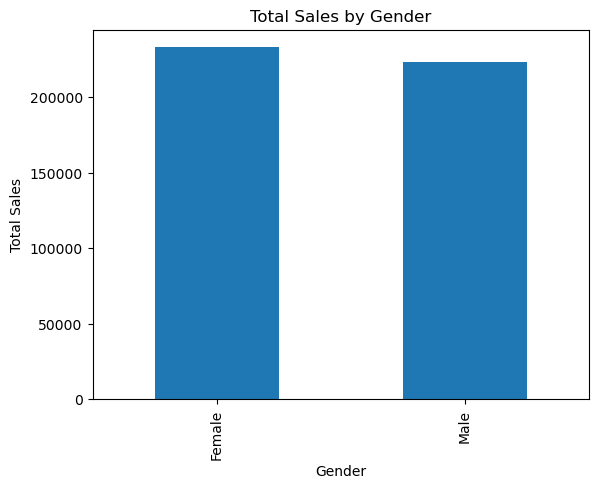

In [33]:
df.groupby('Gender')['Total Amount'].sum().plot(kind='bar', title='Total Sales by Gender')
plt.ylabel('Total Sales')
plt.xlabel('Gender')
plt.show()


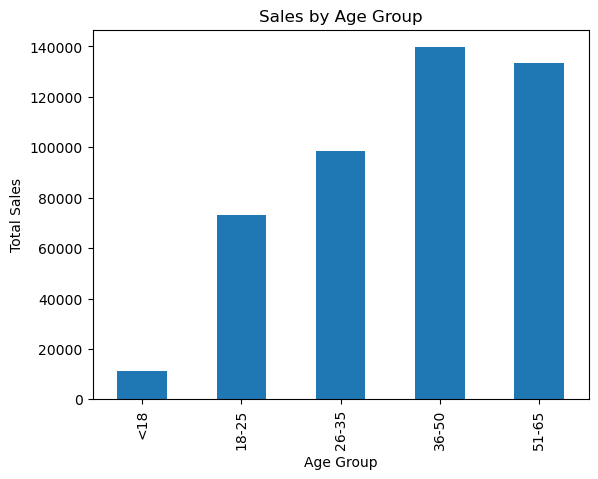

In [37]:
# Create age bins
bins = [0, 18, 25, 35, 50, 65, 100]
labels = ['<18', '18-25', '26-35', '36-50', '51-65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

df.groupby('Age Group', observed=True)['Total Amount'].sum().plot(kind='bar', title='Sales by Age Group')
plt.ylabel('Total Sales')
plt.xlabel('Age Group')
plt.show()
